In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 954


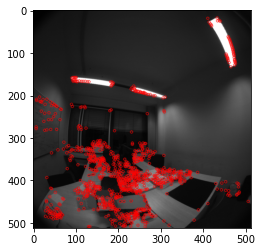

In [65]:
img = cv2.imread('data/tumvi/1520531991856592479.png', cv2.IMREAD_GRAYSCALE) # `<opencv2_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
plt.imshow(img2)

In [66]:
#スコアの高いものからソート
keypoints = []
for p in kp:
    keypoints.append([p.pt, p.size, p.angle, p.response, p.octave, p.class_id])
keypoints = sorted(keypoints, reverse=True, key=lambda x: x[3])

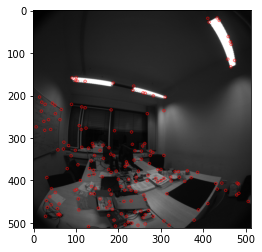

In [68]:
#グリッドに登録
grid_size = 20
grid = np.zeros((img.shape[1] // grid_size + 1, img.shape[0] // grid_size +1)) #x,y
grid = grid.tolist()

grid_keypoints = []
for p in keypoints:
    x = p[0][0]
    y = p[0][1]
    grid_x = int(x / grid_size)
    grid_y = int(y / grid_size)
    if(grid[grid_x][grid_y] == 0):
        grid[grid_x][grid_y] = 1
        temp = cv2.KeyPoint(
                    x=x,
                    y=y,
                    size=p[1],
                    angle=p[2],
                    response=p[3],
                    octave=p[4],
                    class_id=p[5],
                )
        grid_keypoints.append(temp)
img3 = cv2.drawKeypoints(img, grid_keypoints, None, color=(255,0,0))
plt.imshow(img3)

